1.has the hospital's revenue stream fallen below a key threshold?


2.are patients with insurance really charged different amounts than those without? Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating individual charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed

In [2]:
medical = pd.read_csv('data/insurance2.csv')

In [3]:
# Have a quick look
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


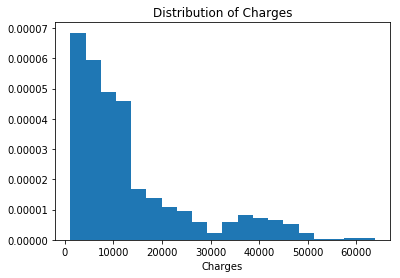

In [26]:
# know about charges
_ = plt.hist(x = medical.charges, bins = 20,density = True)
medical.charges.describe()
_ = plt.title('Distribution of Charges')
_ = plt.xlabel('Charges')

In [12]:
sample_mean = medical.charges.mean()
sample_std = np.std(medical.charges)

In [13]:
sample_mean

13270.422265141257

In [14]:
sample_std

12105.484975561605

In [16]:
# estimate the population standard deviation with Bessel's correction
est_std = np.std(medical.charges, ddof = 1)
est_std

12110.011236693994

In [19]:
sample_size = medical.shape[0]
sample_size

1338

In [23]:
margin_of_error = t.ppf(0.025, df = sample_size -1) * (est_std / np.sqrt(sample_size))

In [32]:
t.ppf(0.975, df = sample_size -1)

1.961739888600845

In [22]:
(est_std / np.sqrt(sample_size))

331.06745431568226

In [24]:
sample_mean + margin_of_error, sample_mean - margin_of_error

(12620.954034192644, 13919.890496089869)

In [27]:
from scipy.stats import norm

In [28]:
norm.ppf(0.025)

-1.9599639845400545

In [29]:
norm.ppf(0.975)

1.959963984540054

In [33]:
norm.ppf(0.99) 

2.3263478740408408